# Machine Learning: Gradiente Descendente Estocástico

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0) # Para termos sempre os mesmos números aleatórios.

Utilizaremos o dataset "Data for Admission in the University", disponível no Kaggle.

In [2]:
data = pd.read_csv('adm_data.csv')

### Visualizando o dataset

In [3]:
data.shape

(400, 9)

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.rename(columns = {'Chance of Admit ': 'Chance of Admit'}, inplace = True)
data.rename(columns = {'LOR ': 'LOR'}, inplace = True)

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Definições:

__Serial No.:__ número de série do estudante (índice + 1)

__GRE Score:__ pontuação do estudante no GRE (Graduate Record Examination), um exame padronizado semelhante ao GMAT.

__TOEFL Score:__ pontuação no TOEFL, um exame completo de inglês utilizado, entre outras coisas, para admissão em universidades.

__University Rating:__ avaliação da universidade (quanto maior, mais conceituada é a universidade na qual o estudante quer entrar).

__SOP:__ avaliação do Statement of Purpose, uma redação explicando o propósito do estudante ao aplicar para uma vaga em uma dada graduação em uma universidade.

__LOR:__ avaliação da Letter of Recommendation, a carta de recomendação do estudante para a universidade.

__CGPA:__ Cumulative Grade Point Average, é uma pontuação utilizada para medir o desempenho médio de um estudante.

__Research:__ experiência em pesquisa (1 se o estudante tiver, 0 se não).

__Chance of Admit:__ chance de admissão na universidade, indo de 0 a 1 (100%).

### Definição da label e das features

Nossa label (y) será a Chance of Admit.

A lista de colunas ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"] contém as features altamente correlacionadas com a chance de admissão na universidade. No nosso caso, iremos tratar apenas das features contínuas, sendo a lista de features que pode ser utilizada a seguinte: features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"].

Implementaremos o algoritmo de __Gradiente Descendente Estocástico em mini-lotes__  nos seguintes casos:

1) Modelo de Regressão Linear com 1 feature.

2) Modelo de Regressão Linear com todas as features contínuas do dataset.

### 1) Modelo de Regressão Linear com 1 feature

O modelo será da forma: 

$\hat{y} = w_{1}x_{1} + b$

Em que $\hat{y}$ é a estimativa (ou predição) da label $y$, dado um valor da feature $x_{1}$, $w_{1}$ é o peso (weight) associado à feature $x_{1}$ e $b$ é chamado de viés (bias).

Vamos definir a perda (loss) associada ao modelo através da função de perda $L_{2}$, também chamada de squared loss. Assim:

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

Em que n é o número de dados que iremos utilizar no aprendizado de nosso modelo.

Podemos escrevê-la ainda como função explícita dos parâmetros $w_{1}$ e $b$:

$loss = f(w_{1}, b) = \frac{1}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})^2$

Como queremos reduzir a perda de nosso modelo ao máximo, devemos fazer os parâmetros variarem na direção do  negativo do gradiente de f (esse é o princípio do algoritmo de Gradiente Descendente Estocástico). 

Nesse contexto, chamemos $\theta = (w_{1}, b)$. Além disso, definimos o hiperparâmetro $\alpha$ como sendo a taxa de aprendizagem do modelo, a qual afeta diretamente a velocidade de convergência do modelo para os parâmetros ideais.

Assim, o novo valor de $\theta$, $\theta'$, será dado pela fórmula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, b)$

Onde $\nabla f(w_{1}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial b})$ é o gradiente de f.

Calculando as derivadas parciais:

$\frac{\partial f}{\partial w_{1}} = \frac{2}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i}) \cdot (x_{1})_{i}$

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})$

Obtemos os novos valores do peso e do viés após uma iteração:

$w_{1}' = w_{1} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i}) \cdot (x_{1})_{i}$

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})$

Com isso em mente, iremos implementar o modelo de regressão linear que se adequa aos dados através do Gradiente Descendente Estocástico em mini-lotes.

In [7]:
class Linear_Regression_Model():
    def __init__(self, data, feature_name: str, label_name: str, w1: float, b: float, alpha: float):
        self.feature = data[feature_name]
        self.label = data[label_name]
        self.w1 = w1
        self.b = b
        self.alpha = alpha
        
    def print_parameters(self):
        print(f'w1 = {self.w1}\nb = {self.b}')
        
    def get_prediction(self, x1: float):
        return self.w1*x1 + self.b
        
    def get_loss(self):
        loss = 0
        n = len(self.label)
        for (x1, y) in zip(self.feature, self.label):
            loss += (1/n)*(self.get_prediction(x1) - y)**2
        return loss
        
    def sgd_update_parameters(self, batch_size: int):
        index_list = list(range(0, len(self.label)))
        random_indices = np.random.choice(index_list, size = batch_size, replace = True) # bootstrap sample
        x1_sample = self.feature.iloc[random_indices]
        y_sample = self.label.iloc[random_indices]
        old_w1 = self.w1
        old_b = self.b
        for (x1, y) in zip(x1_sample, y_sample):
            partial_w1 = (2/batch_size) * (old_w1*x1 + old_b - y) * x1
            partial_b = (2/batch_size) * (old_w1*x1 + old_b - y)
            self.w1 -= self.alpha * partial_w1
            self.b -= self.alpha * partial_b
        
    def sgd(self, iterations: int, batch_size: float, print_loss: bool): # stochastic gradient descent
        for i in range(0, iterations):
            self.sgd_update_parameters(batch_size)
            if print_loss:
                print(f'loss = {self.get_loss()}')

In [8]:
feature_name = 'CGPA'
label_name = 'Chance of Admit'

In [9]:
model = Linear_Regression_Model(data = data, feature_name = feature_name, label_name = label_name, w1 = 0.2, b = -1, alpha = 0.01)

In [10]:
model.sgd(iterations = 10000, batch_size = 50, print_loss = False)

In [11]:
model.print_parameters()

w1 = 0.20625614383688787
b = -1.0437656212134423


### Plotando a reta de regressão obtida através do SGD e comparando com a curva analítica

#### Bibliotecas

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Obtendo os parâmetros da curva analítica através do numpy

In [13]:
m_np, b_np = np.polyfit(data[feature_name], data[label_name], 1)

In [14]:
m_np

0.20884722950069112

In [15]:
b_np

-1.071511662934231

#### Obtendo os pontos da reta SGD

In [16]:
x = np.arange(0, 10.01, 0.01)
y_sgd = []
for x1 in x:
    y_sgd.append(model.get_prediction(x1))
y_sgd = np.array(y_sgd)

#### Plot das retas

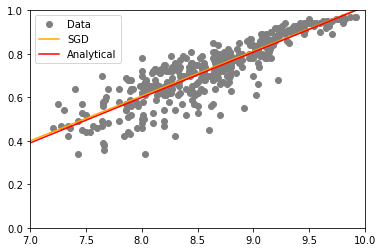

In [17]:
plt.plot(data[feature_name], data[label_name], 'o', color = 'gray') # Plot dos dados
plt.plot(x, y_sgd, color = 'orange') # Plot da reta SGD
plt.plot(x, m_np*x + b_np, color = 'red') # Plot da reta de regressão analítica
plt.xlim([7.0, 10.0])
plt.ylim([0, 1])
plt.legend(['Data', 'SGD', 'Analytical'])

### 2) Modelo de Regressão Linear com todas as features

Com n features, o modelo será da forma:

$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b$

Em que $\hat{y}$ é a estimativa (ou predição) da label $y$, dados os valores das features $x_{1}, x_{2},...,x_{n}$, $(w_{1}, w_{2},...,w_{n})$ é o conjunto de pesos (weight) associado às features e $b$ é chamado de viés (bias).

Vamos definir a perda (loss) associada ao modelo através da função de perda $L_{2}$, da mesma forma que foi feito no primeiro modelo. Assim:

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

Nesse contexto, chamemos $\theta = (w_{1}, w_{2}, ... , w_{n}, b)$. Além disso, definimos o hiperparâmetro $\alpha$ como a taxa de aprendizagem do modelo, de forma análoga ao modelo anterior.

Assim, por meio do gradiente descendente estocástico, o novo valor de $\theta$, $\theta'$, será dado pela fórmula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, w_{2}, ... , w_{n}, b)$

Onde $\nabla f(w_{1}, w_{2}, ... , w_{n}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},..., \frac{\partial f}{\partial w_{n}}, \frac{\partial f}{\partial b})$ é o gradiente de f.

Calculando as derivadas parciais:

$\frac{\partial f}{\partial w_{k}} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$.

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

Obtemos os novos valores do peso e do viés após uma iteração:

$w_{k}' = w_{k} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$.


$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

In [18]:
class Multi_Features_Linear_Regression_Model():
    def __init__(self, train_data, features_name: list, label_name: str, ws: list, b: float, alpha: float, random_state: int):
        self.train_data = train_data
        self.features = train_data[features_name]
        self.label = train_data[label_name]
        self.label_name = label_name # saving here because label as a series doesn't save it.
        for i in range(0, len(ws)):
            ws[i] = float(ws[i])
        self.ws = np.array(ws) # weights
        self.b = b
        self.alpha = alpha
        self.rand = np.random.RandomState(random_state)
        
    def print_parameters(self):
        for i in range(1, len(self.ws) + 1):
            print(f'w{i} = {self.ws[i - 1]}')
        print (f'b = {self.b}')
        
    def get_single_prediction(self, xs: list):
        '''Get the prediction for a list with all the features' values.'''
        for i in range(0, len(xs)):
            xs[i] = float(xs[i])
        xs = np.array(xs)
        pred = np.dot(self.ws, xs) + self.b
        return pred
    
    def predict(self, data):
        n = len(data)
        features_name = self.features.columns
        data_features = data[features_name]
        predictions = np.zeros(n)
        for i in range(0, n):
            xs = list(data_features.iloc[i])
            predictions[i] += self.get_single_prediction(xs)
        return predictions
    
    def get_loss(self, data):
        n = len(data)
        data_label = data[self.label_name]
        y = np.array(data_label)
        predictions = self.predict(data)
        diff = predictions - y
        loss = (1/n)*np.dot(diff, diff)
        return loss
               
    def sgd_update_parameters(self, batch_size: int):
        n = len(self.label)
        index_list = list(range(0, n))
        random_indices = self.rand.choice(index_list, size = batch_size, replace = True) # bootstrap sample
        xs_sample = list()
        y_sample = np.array(self.label.iloc[random_indices])
        preds_sample = np.zeros(batch_size)
        for i in range(0, batch_size):
            xs = list(self.features.iloc[random_indices[i]])
            preds_sample[i] += self.get_single_prediction(xs)
        for col in self.features:
            xs_sample.append(np.array(self.features[col].iloc[random_indices])) # len(xs_sample) = len(self.ws)
        diff_sample = preds_sample - y_sample
        partial_w = np.zeros(len(self.ws))
        for i in range(0, len(self.ws)):
            partial_w[i] += (2/batch_size) * np.dot(diff_sample, xs_sample[i])
        partial_b = (2/batch_size) * np.sum(diff_sample)
        self.ws -= self.alpha * partial_w
        self.b -= self.alpha * partial_b
        
    def sgd(self, iterations: int, batch_size: float, print_loss: bool): # stochastic gradient descent
        for i in range(0, iterations):
            self.sgd_update_parameters(batch_size)
            if print_loss:
                print(f'loss = {self.get_loss(self.train_data)}')
    
    @staticmethod
    def shuffle_data(data, random_state):
        rand = np.random.RandomState(random_state)
        return data.reindex(rand.permutation(data.index))
    
    @staticmethod
    def train_val_test_split(data, test_split: float, val_split: float):
        '''Get train, validation and test dataframes from data.'''
        n = len(data)
        test_size = int(test_split * n)
        val_size = int(val_split * n)
        test_data = data.iloc[list(range(0, test_size))]
        val_data = data.iloc[list(range(test_size, test_size + val_size))]
        train_data = data.iloc[list(range(test_size + val_size, n))]
        return train_data, val_data, test_data

In [19]:
features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"]
label = 'Chance of Admit'
ws = [0, 0, 0, 0, 0, 0]
b = 0
alpha = 10**(-6)
multi_features_model = Multi_Features_Linear_Regression_Model(train_data = data, features_name = features,
                                                 label_name = label, ws = ws, b = b, alpha = alpha,
                                                 random_state = 0)

In [20]:
multi_features_model.print_parameters()

w1 = 0.0
w2 = 0.0
w3 = 0.0
w4 = 0.0
w5 = 0.0
w6 = 0.0
b = 0


In [21]:
multi_features_model.sgd(iterations = 1000, batch_size = 50, print_loss = False)

In [22]:
multi_features_model.get_loss(data)

0.014474772444605608

In [23]:
multi_features_model.print_parameters()

w1 = 0.0019295091599966833
w2 = 0.001045757153984496
w3 = 0.00018725309230324785
w4 = 0.00015745378163289423
w5 = 0.00014084973545750904
w6 = 0.0001181198175654461
b = -1.6019755666874852e-07


In [24]:
n = len(data[label])
pred = np.zeros(n)
pred = multi_features_model.predict(data)

In [25]:
data_with_pred = data.assign(Predictions = pred)

In [26]:
data_with_pred

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Predictions
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.776875
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.740117
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.720956
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.738824
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.715660
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.742868
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.741589
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.761332
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.712433
